In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
tf.__version__

'2.2.0'

In [10]:
w_number = 6
x_number = 100

In [13]:
y = 1
yprime = 0
x = tf.Variable(tf.random_normal([x_number]), name = 'x')
for i in range(1, w_number + 1):
    globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
    y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
    yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

In [14]:
cost = tf.reduce_mean(tf.square(yprime - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30001):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
    if step % 1000 == 0:
#         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
        print(step, "Cost: ", cost_val, "\n")
        print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")

0 Cost:  1466.3536 

w1:  [array([0.8087095], dtype=float32)] w2:  [array([1.43524], dtype=float32)] w3:  [array([-1.2921952], dtype=float32)] w4:  [array([0.1132247], dtype=float32)] w5:  [array([0.04518669], dtype=float32)] w6:  [array([0.0843508], dtype=float32)] 

1000 Cost:  10.551974 

w1:  [array([0.90887004], dtype=float32)] w2:  [array([1.2796409], dtype=float32)] w3:  [array([-1.0194082], dtype=float32)] w4:  [array([-0.3130697], dtype=float32)] w5:  [array([0.15032908], dtype=float32)] w6:  [array([0.03370805], dtype=float32)] 

2000 Cost:  5.666691 

w1:  [array([0.9630982], dtype=float32)] w2:  [array([1.2096816], dtype=float32)] w3:  [array([-0.88642937], dtype=float32)] w4:  [array([-0.44338346], dtype=float32)] w5:  [array([0.12906158], dtype=float32)] w6:  [array([0.04793152], dtype=float32)] 

3000 Cost:  4.194283 

w1:  [array([0.99953574], dtype=float32)] w2:  [array([1.169713], dtype=float32)] w3:  [array([-0.7997717], dtype=float32)] w4:  [array([-0.48266417], dty

30000 Cost:  0.25530854 

w1:  [array([1.2985834], dtype=float32)] w2:  [array([0.92290586], dtype=float32)] w3:  [array([-0.15146473], dtype=float32)] w4:  [array([-0.18108742], dtype=float32)] w5:  [array([0.05779587], dtype=float32)] w6:  [array([0.02771398], dtype=float32)] 



In [16]:
def y(x):
    answer = 1
    for i in range(1, w_number + 1):
        answer += globals()['w{}_val'.format(i)]*(x**i)
    return answer[0]

In [17]:
globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]

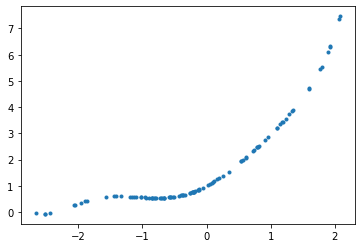

In [18]:
plt.plot(x_val, y(x_val), '.')
plt.show()

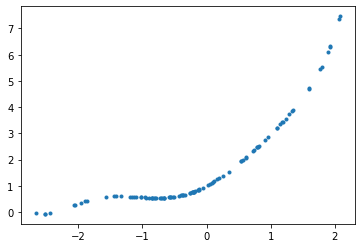

In [19]:
plt.plot(w6x100[0],w6x100[1], '.')
plt.show()